#**Mesures de performance**


---



Les **métriques d'évaluation** sont importantes dans tout projet d'apprentissage automatique, elles résument efficacement la performance de votre modèle. Bien que la plupart des métriques de performance soient faciles à mettre en œuvre ou au moins à calculer, en particulier avec des librairies spécialisées telles que **scikit-learn**, le défi consiste à savoir quand utiliser une métrique spécifique et comment l'interpréter correctement. Ce qui rend les choses encore plus difficiles, c'est que parfois, la même métrique peut avoir des significations différentes dans des contextes différents. Les tâches d'apprentissage peuvent être classées comme **supervisées** ou **non supervisées**, en plus les tâches supervisées peuvent être classées en tâches de régression ou de classification. Nous présenterons des exemples de métriques pour chaque tâche d'apprentissage.






## **1- Régression**


---



Nous allons utiliser le jeu de données sur le **diabète** fourni par **scikit-learn**.
Il s'agit d'un problème de régression où l'ensemble de données se compose de dix variables de base : l'âge, le sexe, l'indice de masse corporelle, la pression artérielle moyenne et six mesures du sérum sanguin ont été obtenues pour chacun des n = 442 patients diabétiques. La variable cible ici est une mesure quantitative de la progression de la maladie un an après la prise de ces mesures.

In [ ]:
# importer les librairies
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# charger les données
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# diviser les données en un ensemble d'entrainement et un ensemble de test
diabetes_X_train = diabetes_X[:-100]
diabetes_X_test = diabetes_X[-100:]

diabetes_y_train = diabetes_y[:-100]
diabetes_y_test = diabetes_y[-100:]


In [ ]:
# définir le modèle
regr_model = linear_model.LinearRegression()

# entrainer le modèle
regr_model.fit(diabetes_X_train, diabetes_y_train)

# faire des prédictions
diabetes_y_pred = regr_model.predict(diabetes_X_test)

**Remarque:** Les métriques d'évaluation de régression suivantes ne sont pas mutuellement exclusives, en fait, vous êtes encouragé à les utiliser toutes ensemble afin d'avoir un aperçu clair et complet des performances de votre modèle

**1-2- Erreur quadratique moyenne (MSE)**

La différence quadratique moyenne entre la valeur réelle et la valeur prédite, certaines de ses propriétés sont:


*   Les erreurs sont élevées au carré, ce qui fait que les petites erreurs ont des valeurs plus grandes, ce qui peut sous-estimer la qualité de votre modèle.
*   Lors de l'interprétation vous devez garder le facteur carré dans votre tete, dans notre cas c'est:
\begin{equation}(progression)^2\end{equation}
*   En raison de l'utilisation du carré, il est fondamentalement plus affecté par les valeurs aberrantes(**Outliers**) que les autres mesures.





\begin{equation}MSE = \frac{1}{N}\sum_{i=0}^N(y_i - \hat{y_i})^2\end{equation}

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'MSE:{mean_squared_error(diabetes_y_test,diabetes_y_pred)}')

MSE:2693.8531990938804


**1-1- Erreur absolue moyenne (MAE)**

La différence moyenne absolue entre la valeur réelle et la valeur prédite:


*   Plus robuste aux valeurs aberrantes car elle n'augmente pas les erreurs.
*   Elle est facilement interprétable car sa valeur est de la même grandeur que la variable cible.
*   Puisqu'il utilise la valeur absolue, il informe de la distance entre la prédiction et la valeur réelle, mais il ne nous dit pas dans quelle direction.






\begin{equation}MAE = \frac{1}{N}\sum_{i=0}^N|y_i - \hat{y_i}|\end{equation}

In [ ]:
from sklearn.metrics import mean_absolute_error
print(f'MAE:{mean_absolute_error(diabetes_y_test,diabetes_y_pred)}')

MAE:40.44130107400519


**1-3- Racine de l'erreur quadratique moyenne (RMSE)**

Il s'agit essentiellement de la racine carrée de la métrique **MSE**, et en raison de l'utilisation du carré, elle résout les inconvénients de la MSE mentionnés précédemment.

\begin{equation}RMSE = \sqrt{\frac{1}{N}\sum_{i=0}^N(y_i - \hat{y_i})^2}\end{equation}

In [ ]:
from sklearn.metrics import mean_squared_error
print(f'RMSE:{mean_squared_error(diabetes_y_test,diabetes_y_pred,squared=False)}')

RMSE:51.90234290563269


**1-4- Coefficient de détermination R-Carré**

Cette métrique répond à la question suivante : Quel **pourcentage de la variation dans la variable cible** est expliqué par **la variation dans les prédicteurs** ? la valeur de cette métrique est comprise entre **0 et 1** et elle est interprétée comme un pourcentage. 

Cette métrique souffre du problème suivant : elle peut donner l'impression que le modèle s'améliore en donnant un score proche de 1, mais elle peut en fait être un signe de sur-apprentissage(**overfitting**), en particulier lors de l'ajout de nouveaux prédicteurs.

\begin{equation}R^2 = 1- \frac{SS_t}{SS_r}\end{equation}




Ou \begin{equation}SS_t = \sum_{i=0}^N(y_i - \hat{y})^2\end{equation}

\begin{equation}SS_r = \sum_{i=0}^N(y_i - f_i)^2\end{equation}

In [ ]:
from sklearn.metrics import r2_score
print("R2 score: {:.2f}%".format(r2_score(diabetes_y_test,diabetes_y_pred)*100))

R2 score: 55.52%


Ici, nous pouvons voir qu'environ 55% de la variation de la variable cible est expliquée par les prédicteurs.

**1-5- Coefficient de détermination R-Carré ajusté**

Pour tenir compte du problème posé par la version vanille du coefficient de détermination, une version ajustée a été proposée : la nouvelle métrique s'ajuste en fonction du nombre de prédicteurs et elle n'augmente pas si l'apprentissage n'a pas lieu, même si le nombre de prédicteurs augmente. La valeur du **R-carré ajusté** est toujours plus petite que la valeur du **R-carré**

\begin{equation}\hat{R^2} = 1 - (1-R^2)\frac{n-1}{n-p-1}\end{equation}

Où **n** est le nombre total d'échantillons et **p** est le nombre de prédicteurs.

In [ ]:
R2 = r2_score(diabetes_y_test,diabetes_y_pred) 
adjusted_R2 = 1 -(1-R2)*(len(diabetes_X)-1)/(len(diabetes_X)-diabetes_X.shape[1]-1)
print('Adjusted R2 score: {:.2f}%'.format(adjusted_R2*100))

Adjusted R2 score: 54.49%


Le score R2 ajusté(**54.49%**) est un peu plus petit  que le score R2(**55.52%**) ce qui confirme notre définition précédente

## **2- Classification**


---



Pour le problème de classification, nous allons utiliser la fonction **make_classification** de scikit-learn pour générer des données de classification binaire avec **500 échantillons**, **5 features** et **2 classes**.

In [ ]:
# charger les données
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Générer des données pour la classification
X, y = make_classification(n_samples=500,n_features=5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# définir le modèle
from sklearn.svm import SVC

svc = SVC(random_state=42)
svc.fit(X_train, y_train)

# faire des prédictions
y_pred =svc.predict(X_test)

**2-1- Matrice de confusion**

Il s'agit d'une représentation sous forme de tableau des valeurs réelles par rapport aux prédictions du modèle où les lignes représentent les instances prédites dans chaque classe prédite tandis que les colonnes représentent les instances de la classe réelle:

|Vrai/Prédit | P | N |
| --- | --- | --- |
| P |  TP | FP |
| N |  FN | TN |

*   **P:** La classe positive.
*   **N:** La classe négative.
*   **Vrais négatifs (VN):** Le nombre d'échantillons négatifs que le modèle a classé correctement.
*   **Faux positifs (FP):** Le nombre d'échantillons négatives classés incorrectement comme positives.
*   **Faux négatifs (FN):** Le nombre d'échantillons positifs classés incorrectement comme négatifs.
*   **Vrais positifs (VP):**Le nombre d'échantillons positifs correctement classés comme positifs.





**Example:** Prenons l'exemple du modèle permettant de déterminer si un patient a ou n'a pas **Covid19** 

*   **P:** La classe positive signifiant que le patient a **Covid19**
*   **N:** La classe négative signifiant que le patient n'a pas de **Covid19**
*   **Vrais négatifs:** Les patients qui ont été classés comme négatifs et qui n'ont pas de **Covid19**
*   **Faux positifs:** Les patients qui ont été classés comme positifs et qui n'ont pas de Covid19
*   **Faux négatifs:** Les patients qui ont été classés comme négatifs bien qu'ils aient Covid19
*   **Vrais positifs:** Les patients qui ont été classés comme positifs et qui ont en fait du **Covid19**



In [ ]:
from sklearn.metrics import confusion_matrix
print('Matrice de confusion: \n', confusion_matrix(y_test, y_pred))

Matrice de confusion: 
 [[34  6]
 [ 8 52]]


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print('nombre des vrais négatifs:',tn)
print('nombre des faux positifs:',fp)
print('nombre des faux négatifs:',fn)
print('nombre des vrais positifs:',tp)

nombre des vrais négatifs: 34
nombre des faux positifs: 6
nombre des faux négatifs: 8
nombre des vrais positifs: 52


**2-2- Accuracy** 

Le nombre de classifications correctes divisé par le nombre total de classifications effectuées par le modèle:

\begin{equation}Accuracy = \frac{VP+VF}{FP+FN+VN+VP}\end{equation}

In [ ]:
print(f'Accuracy:{(tp+tn)/(fp+fn+tn+tp)}')

Accuracy:0.86


In [ ]:
from sklearn.metrics import accuracy_score
print(f'Accuracy:{accuracy_score(y_test, y_pred, normalize=True)}')

Accuracy:0.86


La précision est une bonne mesure lorsque l'on s'intéresse uniquement au pourcentage de classifications correctes, qu'elles soient négatives ou positives. Cependant, elle peut parfois être trompeuse : pour revenir à notre exemple de détection de Covid19, si nous avons 100 patients parmi lesquels il y en a 10 qui ont le Covid19. En classant simplement tous les patients comme négatifs, nous pouvons obtenir une précision de 90 % ! Cela peut sembler un très bon résultat à première vue, mais notre modèle n'a pas réussi à détecter un seul cas de Covid19, ce qui le rend absolument inutile.

**2-4- Rappel**

Également appelé **sensibilité** ou **taux de vrais positifs** **(TVP)**, c'est le nombre de classifications positives correctes effectuées par le modèle divisé par le nombre total d'échantillons positifs vrais dans l'ensemble de données

\begin{equation}Rappel = \frac{VP}{VP+FN}\end{equation}

In [ ]:
print('Recall: ',(tp/(tp+fn)))

Recall:  0.8666666666666667


In [ ]:
# En utilisant une fonction prédéfinie de scikit-learn
from sklearn.metrics import recall_score
print('Recall:',recall_score(y_test, y_pred))

Recall: 0.8666666666666667


Il s'agit d'une mesure importante, sur tous les patients qui ont effectivement le Covid19, quelle est la fraction que vous avez identifiée correctement. Si nous faisons comme précédemment et classons chaque patient comme négatif, cela donnera un rappel de zéro.

**Rappel = 0/10 = 0**

Donc, dans ce contexte, le rappel est une bonne mesure. Il indique que la terrible stratégie consistant à identifier chaque patient comme négatif au Covid19 conduit à un rappel nul. Et nous voulons maximiser le rappel.

Donc, pour résumer: il s'avère que le **Accuracy** était une mauvaise idée parce que classer tous les patients comme négatifs peut augmenter l'augmenter, donc le **Rappel** sera une bonne mesure dans ce contexte, mais nous réalisons ensuite que classer tous les patients comme positifs augmentera également le **Rappel**.

Le rappel n'est donc pas une bonne mesure en soi.

C'est pourquoi nous avons besoin de la **Précision**.

**2-3- Précision**

Le nombre de classifications positives correctes divisé par le nombre total de classifications positives:

\begin{equation}Précision = \frac{VP}{FP+VP}\end{equation}

In [ ]:
print('Precision: ',(tp/(tp+fp)))

Precision:  0.896551724137931


In [ ]:
# En utilisant une fonction prédéfinie de scikit-learn
from sklearn.metrics import precision_score
print('Precision:',precision_score(y_test, y_pred))

Precision: 0.896551724137931


Envisager une autre stratégie : classer les meilleurs patients comme positifs, c'est-à-dire classer les patients ayant la plus forte probabilité d'avoir un Covid19.

La précision est : **1/ (1 + 0) = 1**

La valeur de précision est bonne dans ce cas mais vérifions la valeur de rappel :

**Rappel = 1 / (1 + 9) = 0.1**

La valeur de Précision est bonne dans ce contexte mais la valeur de Rappel est faible. 
Alors que faire pour avoir à la fois une Précision et un Rappel élevés ? Malheureusement, on ne peut pas avoir le beurre et l'argent du beurre : augmenter la Précision réduit le Rappel et vice versa. C'est ce qu'on appelle le **compromis précision/rappel**.

Un tableau récapitulatif de toutes les trois stratégies et de leur impact sur les trois mesures que nous avons vues:

|Stratégie| Accuracy | Rappel | Précision
| --- | --- | --- | --- |
| Classer tous les patients comme négatifs | élevé | faible | faible |
| Classer tous les patients comme positive | faible | élevé | faible |
| Classer les patients avec une probabilité maximale comme positifs. | élevé | faible | faible |

**Conclusion:**
Dans certains cas, nous sommes pratiquement certains de vouloir maximiser soit le rappel soit la précision. Comme dans le cas de la détection des patients ayant Covid19, nous voulons vraiment que les prédictions soient justes pour les patients ayant Covid19 positifs, car il est très coûteux de ne pas prédire le patient correctement, car permettre à une personne qui a le Covid19 de partir le traitement entraînera la contamination des autres. Nous sommes donc plus intéressés par le rappel ici.

**2-8- La courbe PR**

La courbe **Precision-Recall (PR)** montre le compromis entre la précision et le rappel pour différents seuils. Une zone élevée sous la courbe représente à la fois un rappel et une précision élevés, où une précision élevée correspond à un faible taux de faux positifs(TFP), et un rappel élevé correspond à un faible taux de faux négatifs(TFN). Des scores élevés pour les deux montrent que le classificateur renvoie des résultats exacts (précision élevée), ainsi qu'une majorité de tous les résultats positifs (rappel élevé).

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.86')

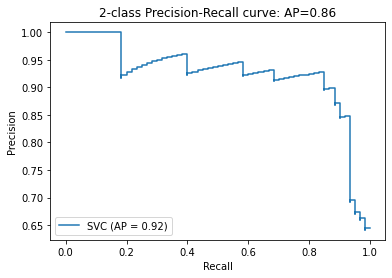

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, y_pred)
disp = plot_precision_recall_curve(svc, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))


La relation entre le rappel et la précision peut être observée dans la zone des marches du graphique - aux bords de ces marches, un petit changement dans le seuil réduit considérablement la précision, avec seulement un gain mineur dans le rappel.

**2-6- Score F1**

La métrique du **score F1** utilise une combinaison de la précision et du rappel. En fait, le score F1 est **la moyenne harmonique** des deux. Un score F1 élevé symbolise une précision élevée ainsi qu'un rappel élevé. Il présente un bon équilibre entre la précision et le rappel. Cependant, un score F1 bas ne nous dit (presque) rien, Avec un F1 bas, il n'est pas clair quel est le problème (faible précision ou faible rappel ?), c'est pourquoi il est conseillé d'utiliser le **TFP** (taux de faux positifs) avec le score F1 pour tenir compte de cet inconvénient.

\begin{equation}F1 = 2*\frac{Précision*Rappel}{Précision+Rappel}\end{equation}

In [ ]:
print('F1 score:',2*((tp/(tp+fp))*(tp/(tp+fn)))/((tp/(tp+fp))+(tp/(tp+fn))))

F1 score: 0.8813559322033899


In [ ]:
# En utilisant une fonction prédéfinie de scikit-learn
from sklearn.metrics import f1_score
print(f'F1 score:{f1_score(y_test,y_pred)}')


F1 score:0.8813559322033899


Pourquoi utiliser **la moyenne harmonique** et non **la moyenne simple** ? 

Nous utilisons la moyenne harmonique car elle n'est pas sensible aux valeurs extrêmement grandes, contrairement aux moyennes simples. Disons que nous avons un modèle avec une Précision de 1 et un Rappel de 0, ce qui donne une moyenne simple de 0,5 et un score F1 de 0. Si l'un des paramètres est faible, le second ne compte plus dans le score F1. Le score F1 favorise les classificateurs qui ont une Précision et un Rappel similaires. Ainsi, le score F1 est une meilleure mesure à utiliser si vous recherchez un équilibre entre la précision et le rappel.

**2-5- Spécificité**

Également appelé **TVN (taux de vrais négatifs)**, le nombre de classifications négatives correctes effectuées par le modèle divisé par le nombre total d'échantillons négatifs vrais dans l'ensemble de données.

\begin{equation}Spécifité = \frac{VN}{VN+FP}\end{equation}

In [ ]:
print('Spécifité: ',(tn/(tn+fp)))

Spécifité:  0.85


La **spécificité** dans notre exemple concerne la capacité du modèle à rejeter correctement les patients négatifs qui n'ont pas de Covid19. Dans ce cas, cette métrique n'est pas très utile car la pénalité liée à la classification positive d'un patient sain comme ayant Covid19 est négligeable. Cependant, imaginez que nous utilisions le modèle pour détecter une maladie extrêmement rare ou que le test de diagnostic soit extrêmement coûteux, La spécificité pourrait être une bonne mesure dans ces cas.

### **Astuce:**
Pour décider de la métrique de classification à utiliser, posez-vous la question suivante : êtes-vous intéressé par l'identification de classes positives plus importantes que les classes négatives ? quelle est la pénalité pour classer une classe négative comme positive et via versa ? la réponse devrait vous guider dans le choix de la bonne métrique. gardez à l'esprit que parfois la réponse à la question ci-dessus n'est pas claire et qu'elle dépend fortement du contexte, par exemple : détection des emails spam, certains préféreraient maximiser le nombre de spams correctement classés (peut-être parce qu'ils contiennent du contenu suspect ou des liens malveillants) même si cela signifie parfois mal classer quelques emails illégitimes, d'autres préfèrent l'inverse, où les emails illégitimes sont considérés comme sensibles ou précieux de sorte que le fait de les classer comme spam est pénalisant.

Assurez-vous donc de bien comprendre le problème avant de choisir la métrique qui vous convient le mieux.

**2-7- La courbe ROC**

La courbe **ROC** est une mesure de performance pour les problèmes de classification, elle indique dans quelle mesure le modèle est capable de faire la distinction entre différentes classes. La courbe ROC est tracée avec le **TVR (taux de vrais positifs)** en fonction du **TFP (taux de faux positifs)**, le **TVR** étant sur l'axe des y et le **TFP** sur l'axe des x.

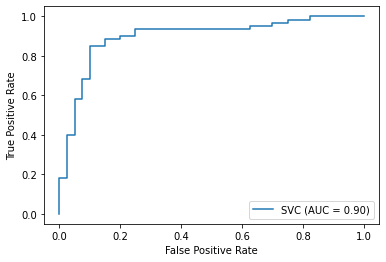

In [ ]:
from sklearn.metrics import plot_roc_curve
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

## **3- Clustering**


---



Le **Clustering** est une tâche d'apprentissage automatique non-supervisée dans laquelle le modèle tente de regrouper des échantillons en **clusters** sur la base d'**une mesure de similarité** spécifique calculée sur leurs features. L'évaluation d'un modèle dans cette setting est difficile parce que, la plupart du temps, il n'y a pas de vérité du terrain (ground-truth) ou des labels vraies auxquelles nous pouvons comparer notre clustering, donc le choix et l'interprétation de la métrique d'évaluation dépendent fortement du contexte.

D'une manière générale, toutes les mesures d'évaluation du clustering visent à quantifier la qualité du regroupement et de la séparation des clusters résultants.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn import cluster

# générer des clusters de données aleatoires
X, y = make_blobs(n_samples=250, centers=3, n_features=2,
                 random_state=42)

In [ ]:
# définir le modèle, ici nous allons utiliser K-means
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

**3-1- Indice Davies-Bouldin**

Cet indice signifie la "similarité" moyenne entre les clusters, où la similarité est une mesure qui compare la distance entre les clusters avec la taille des clusters eux-mêmes.

Zéro est le score le plus bas possible. Les valeurs plus proches de zéro indiquent une meilleure partition.

In [ ]:
from sklearn.metrics import davies_bouldin_score
print(f'score Davies-Bouldin: {davies_bouldin_score(X,k_means.labels_)}')

score Davies-Bouldin: 0.21438375625027106


**3-2- Calinski-Harabasz Index**
L'indice **Calinski-Harabasz** (également connu sous le nom de critère du rapport de variance) est une mesure de la similarité d'un échantillon à sa propre grappe (cohésion) par rapport aux autres grappes (séparation). Ici, la cohésion est estimée sur la base des distances entre les points de données d'un cluster et son centroïde de cluster et la séparation est basée sur la distance entre les centroïdes de cluster et le centroïde global. L'indice de Calinski-Harabasz varie entre 0 (pire classification) et l'infini (meilleure classification).

Il dépend fortement de N (le nombre d'échantillons), par conséquent, son ordre de grandeur peut varier considérablement d'un jeu de données à l'autre.

In [ ]:
from sklearn.metrics import calinski_harabasz_score
print(f'calinski harabasz score: {calinski_harabasz_score(X, k_means.labels_)}')

calinski harabasz score: 4188.035215622732


**3-3- Silhouette Coefficient**

Comme l'indice précédent, l'indice de **silhouette** est une mesure de la similarité d'un échantillon avec son propre cluster (cohésion) par rapport aux autres clusters (séparation). Cependant, la silhouette varie de -1 à +1, où une valeur élevée indique que l'échantillon est bien adapté à son propre cluster et mal adapté aux clusters voisins. Si la plupart des échantillons ont une valeur élevée, alors la configuration du clustering est appropriée. Si de nombreux échantillons ont une valeur faible ou négative, alors la configuration de clustering peut avoir trop ou trop peu de clusters.

Le Coefficient de Silhouette est défini pour chaque échantillon et est composé de deux scores :

**a** : La distance moyenne entre un échantillon et tous les autres points de la même classe.

**b** : La distance moyenne entre un échantillon et tous les autres points de la classe la plus proche.

\begin{equation}Silhouette = \frac{b-a}{max(a,b)}\end{equation}

**Equation**

In [ ]:
from sklearn.metrics import silhouette_score
print(f'silhouette score: {silhouette_score(X, k_means.labels_)}')

silhouette score: 0.8460055933437445


**bold text**

Il existe de nombreuses autres métriques que vous pouvez utiliser pour évaluer la qualité de votre clustering, pour plus d'informations sur les autres métriques , vous pouvez consulter [la page de documentation officielle de scikit-learn](https://scikit-learn.org/stable/modules/clustering.html#clustering) qui présente une excellente explication de chaque métrique, de sa formule mathématique et de son implémentation.